#                           Logistic Regression

      Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).       

# 1. Reading the Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\Gaurav\\Desktop\\MachineLearning\\FloatInt\\L06LogisticRegression-191204-201900\\L06\\loans.csv")
df.head()

,accepted,creditscore,amount,age,marital,health_ins,creditgrade
0,0,387,42580093,87,0,0,A
1,0,400,80816186,49,0,1,A
2,0,360,37264552,46,1,0,A
3,0,378,7209235,38,1,0,A
4,0,387,71637479,51,1,0,A


In [3]:
df.shape

(2500, 7)

In [4]:
df.describe()

,accepted,creditscore,amount,age,marital,health_ins
count,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,0.518800,286.824400,3.364925e+07,58.156400,0.494800,0.440000
std,0.499746,74.884278,2.897636e+07,21.082678,0.500073,0.496486
min,0.000000,100.000000,5.113590e+05,18.000000,0.000000,0.000000
25%,0.000000,246.000000,8.954224e+06,40.000000,0.000000,0.000000
50%,1.000000,298.000000,2.360884e+07,61.000000,0.000000,0.000000
75%,1.000000,343.250000,5.592593e+07,76.000000,1.000000,1.000000
max,1.000000,400.000000,9.995992e+07,90.000000,1.000000,1.000000


# 2. Loading the library

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

import matplotlib.pyplot as plt

In [6]:
x=df['creditscore']
y=df['accepted']

In [7]:
print(y.value_counts())

1    1297
0    1203
Name: accepted, dtype: int64


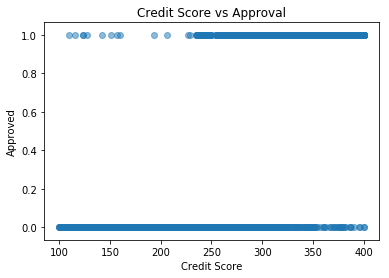

In [8]:
plt.scatter(x,y,alpha=0.5)
plt.title("Credit Score vs Approval")
plt.xlabel("Credit Score")
plt.ylabel("Approved")
plt.show()

It shows that credit score is not only the reason behind accepting and rejecting the loan.
There may be many other reason behind this.

# 3. Model Building   [Using only 1 Column]

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.7,random_state=0)
xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)
ytrain=pd.DataFrame(ytrain)
ytest=pd.DataFrame(ytest)

In [10]:
#Transformation
scale=MinMaxScaler()
xtrain=scale.fit_transform(xtrain)
xtest=scale.transform(xtest)

C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
#Initializing the instance of the class
model=LogisticRegression(random_state=0,solver='lbfgs')

#Fitting the model
model.fit(xtrain,ytrain)

C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# 4. Predicting the Value

In [12]:
pred_prob=model.predict_proba(xtest)   #give the actual probability values  [[p,1-p]]

In [13]:
pred=model.predict(xtest)      #give the value as 0 and 1    [0,1,0....]

In [14]:
print("       Accuracy Score")
print("---------------------------------")
accuracy_score(ytest,pred)

       Accuracy Score
---------------------------------


0.8022857142857143

          Our model gives correct output for 80 input for every input in probability.
          
 Now we will take all the columns as input and try to check whether our accuracy improves or not.

# a. Model Building   [Using all Columns]

In [15]:
x=df[["creditscore","amount","age","marital","health_ins"]]
y=df["accepted"]

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.7,random_state=0)
xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)
ytrain=pd.DataFrame(ytrain)
ytest=pd.DataFrame(ytest)

In [17]:
#Transformation
scale=MinMaxScaler()
xtrain=scale.fit_transform(xtrain)
xtest=scale.transform(xtest)

C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
#Initializing the instance of the class
model=LogisticRegression(random_state=0,solver='lbfgs')

#Fitting the model
model.fit(xtrain,ytrain)

C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# b. Predicting from Modal

In [19]:
pred=model.predict(xtest)      #give the value as 0 and 1    [0,1,0....]

In [20]:
print("       Accuracy Score")
print("---------------------------------")
accuracy_score(ytest,pred)

       Accuracy Score
---------------------------------


0.9514285714285714

          We see that ou accuracy have incresed from 80 to 95%.